In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier

In [2]:
big5_sc = pd.read_csv('./big5_scored.csv')

In [3]:
big5_sc

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,3,2,3,2,3,2,2,4,2,...,3,4,2,3,3,25,39,36,32,30
19716,2,1,4,1,5,1,1,4,1,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,2,2,3,2,2,1,3,4,1,...,5,5,3,5,5,21,20,38,43,42


In [4]:
C = big5_sc.loc[:, "C1":"C10"]

In [5]:
C.loc[:,"score"] = big5_sc.loc[:,"C_SC"]

C:\Users\ajou\AppData\Local\Temp\ipykernel_14760\3303134819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C.loc[:,"score"] = big5_sc.loc[:,"C_SC"]


In [6]:
C

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,score
0,4,5,5,5,5,5,4,5,4,5,47
1,4,5,3,4,3,5,5,5,4,4,42
2,4,5,5,5,5,5,5,5,5,5,49
3,3,3,4,1,1,2,5,2,2,3,26
4,3,5,5,3,3,5,1,3,3,3,34
...,...,...,...,...,...,...,...,...,...,...,...
19714,3,4,5,3,3,3,4,3,4,4,36
19715,3,3,4,4,2,2,4,4,3,3,32
19716,2,1,5,1,4,1,1,2,1,5,23
19717,5,3,5,4,4,4,5,5,3,5,43


In [7]:
categorys = []
for val in C['score']:
    if val < 30:
        category = 0
    else:
        category = 1
    categorys.append(category)
    
C['C'] = categorys

C:\Users\ajou\AppData\Local\Temp\ipykernel_14760\4143820691.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['C'] = categorys


In [8]:
C

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,score,C
0,4,5,5,5,5,5,4,5,4,5,47,1
1,4,5,3,4,3,5,5,5,4,4,42,1
2,4,5,5,5,5,5,5,5,5,5,49,1
3,3,3,4,1,1,2,5,2,2,3,26,0
4,3,5,5,3,3,5,1,3,3,3,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19714,3,4,5,3,3,3,4,3,4,4,36,1
19715,3,3,4,4,2,2,4,4,3,3,32,1
19716,2,1,5,1,4,1,1,2,1,5,23,0
19717,5,3,5,4,4,4,5,5,3,5,43,1


In [9]:
C_train_X, C_train_y = C.iloc[:int(len(C.index)*0.8), :-2], C.iloc[:int(len(C.index)*0.8), -1]
C_test_X, C_test_y = C.iloc[int(len(C.index)*0.8):, :-2], C.iloc[int(len(C.index)*0.8):, -1]
C_test_X = C_test_X.reset_index(drop=True)

In [10]:
C_classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
C_classifier.fit(C_train_X, C_train_y)

C_train_score = C_classifier.score(C_train_X, C_train_y)
print(C_train_score)

C_score = C_classifier.score(C_test_X, C_test_y)
print(C_score)

0.9986687797147386
0.9586713995943205


In [11]:
C_train_y_pred = C_classifier.predict(C_train_X)
print('총 학습 개수 : %d, 오류개수 : %d' %(len(C_train_y), (C_train_y != C_train_y_pred).sum()))
print('정확도 : %.2f' %((len(C_train_y) - (C_train_y != C_train_y_pred).sum()) / len(C_train_y)))

총 학습 개수 : 15775, 오류개수 : 21
정확도 : 1.00


In [12]:
C_y_pred = C_classifier.predict(C_test_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(C_test_y), (C_test_y != C_y_pred).sum()))
print('정확도 : %.2f' %((len(C_test_y) - (C_test_y != C_y_pred).sum()) / len(C_test_y)))

총 테스트 개수 : 3944, 오류개수 : 163
정확도 : 0.96


feature ranking:
1. feature C6 (0.163)
2. feature C1 (0.134)
3. feature C5 (0.133)
4. feature C4 (0.111)
5. feature C9 (0.106)
6. feature C7 (0.103)
7. feature C2 (0.075)
8. feature C8 (0.060)
9. feature C10 (0.059)
10. feature C3 (0.056)


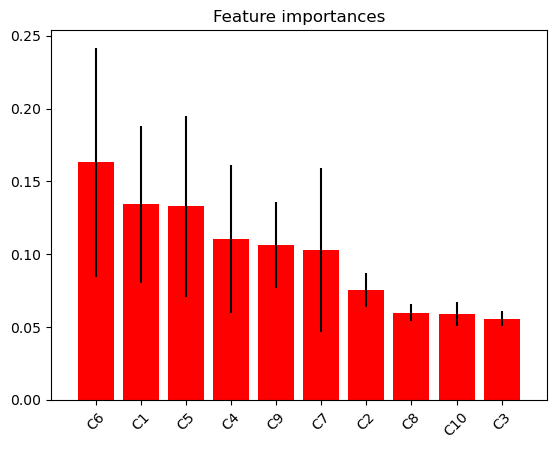

In [13]:
importances = C_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in C_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("feature ranking:")

for f in range(len(C_train_X.columns)):
    print("{}. feature {} ({:.3f})".format(f+1, C_train_X.columns[indices][f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(C_train_X.columns)), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(len(C_train_X.columns)), C_train_X.columns[indices], rotation = 45)
plt.xlim([-1, len(C_train_X.columns)])
plt.show()

In [14]:
random.seed(0)
shuffled_scores = {}

for feature in C_train_X.columns:
    copy = C_train_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = C_classifier.score(copy, C_train_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'C1': 0.9458003169572108, 'C2': 0.9497939778129952, 'C3': 0.9608240887480191, 'C4': 0.9412361331220285, 'C5': 0.9456101426307448, 'C6': 0.9301426307448495, 'C7': 0.9519492868462758, 'C8': 0.9630427892234549, 'C9': 0.9441521394611727, 'C10': 0.9638668779714739}


In [15]:
print("Original Classfication Accuracy : %.4f"%C_train_score)
for n in range(len(C_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[C_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9987
1 high importance shuffled Accuracy : 0.9301
2 high importance shuffled Accuracy : 0.9458
3 high importance shuffled Accuracy : 0.9456
4 high importance shuffled Accuracy : 0.9412
5 high importance shuffled Accuracy : 0.9442
6 high importance shuffled Accuracy : 0.9519
7 high importance shuffled Accuracy : 0.9498
8 high importance shuffled Accuracy : 0.9630
9 high importance shuffled Accuracy : 0.9639
10 high importance shuffled Accuracy : 0.9608


In [16]:
random.seed(0)
shuffled_scores = {}

for feature in C_test_X.columns:
    copy = C_test_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = C_classifier.score(copy, C_test_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'C1': 0.9234279918864098, 'C2': 0.927738336713996, 'C3': 0.9330628803245437, 'C4': 0.9224137931034483, 'C5': 0.9269776876267748, 'C6': 0.9099898580121704, 'C7': 0.9300202839756593, 'C8': 0.9320486815415822, 'C9': 0.9206389452332657, 'C10': 0.940922920892495}


In [17]:
print("Original Classfication Accuracy : %.4f"%C_score)
for n in range(len(C_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[C_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9587
1 high importance shuffled Accuracy : 0.9100
2 high importance shuffled Accuracy : 0.9234
3 high importance shuffled Accuracy : 0.9270
4 high importance shuffled Accuracy : 0.9224
5 high importance shuffled Accuracy : 0.9206
6 high importance shuffled Accuracy : 0.9300
7 high importance shuffled Accuracy : 0.9277
8 high importance shuffled Accuracy : 0.9320
9 high importance shuffled Accuracy : 0.9409
10 high importance shuffled Accuracy : 0.9331


In [19]:
C2_se_train_X = C_train_X.copy()
C2_se_train_X = C2_se_train_X.loc[:, ["C6", "C1"]]

C2_se_test_X = C_test_X.copy()
C2_se_test_X = C2_se_test_X.loc[:, ["C6", "C1"]]
C2_se_test_X = C2_se_test_X.reset_index(drop=True)

C2_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C2_se_classifier.fit(C2_se_train_X, C_train_y)

C2_se_score = C2_se_classifier.score(C2_se_train_X, C_train_y)
print(C2_se_score)

C2_se_test_score = C2_se_classifier.score(C2_se_test_X, C_test_y)
print(C2_se_test_score)

0.8374643423137876
0.8395030425963489


In [20]:
C3_se_train_X = C_train_X.copy()
C3_se_train_X = C3_se_train_X.loc[:, ["C6", "C1","C5"]]

C3_se_test_X = C_test_X.copy()
C3_se_test_X = C3_se_test_X.loc[:, ["C6", "C1","C5"]]
C3_se_test_X = C3_se_test_X.reset_index(drop=True)

C3_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C3_se_classifier.fit(C3_se_train_X, C_train_y)

C3_se_score = C3_se_classifier.score(C3_se_train_X, C_train_y)
print(C3_se_score)

C3_se_test_score = C3_se_classifier.score(C3_se_test_X, C_test_y)
print(C3_se_test_score)

0.8686529318541997
0.8729716024340771


In [21]:
C4_se_train_X = C_train_X.copy()
C4_se_train_X = C4_se_train_X.loc[:, ["C6", "C1","C5","C4"]]

C4_se_test_X = C_test_X.copy()
C4_se_test_X = C4_se_test_X.loc[:, ["C6", "C1","C5","C4"]]
C4_se_test_X = C4_se_test_X.reset_index(drop=True)

C4_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C4_se_classifier.fit(C4_se_train_X, C_train_y)

C4_se_score = C4_se_classifier.score(C4_se_train_X, C_train_y)
print(C4_se_score)

C4_se_test_score = C4_se_classifier.score(C4_se_test_X, C_test_y)
print(C4_se_test_score)

0.8898256735340729
0.8866632860040567


In [23]:
C5_se_train_X = C_train_X.copy()
C5_se_train_X = C5_se_train_X.loc[:, ["C6", "C1","C5","C4","C9"]]

C5_se_test_X = C_test_X.copy()
C5_se_test_X = C5_se_test_X.loc[:, ["C6", "C1","C5","C4","C9"]]
C5_se_test_X = C5_se_test_X.reset_index(drop=True)

C5_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C5_se_classifier.fit(C5_se_train_X, C_train_y)

C5_se_score = C5_se_classifier.score(C5_se_train_X, C_train_y)
print(C5_se_score)

C5_se_test_score = C5_se_classifier.score(C5_se_test_X, C_test_y)
print(C5_se_test_score)

0.92
0.9066937119675457


In [24]:
C5_se_train_X = C_train_X.copy()
C5_se_train_X = C5_se_train_X.loc[:, ["C6", "C1","C5","C4","C9", "C7"]]

C5_se_test_X = C_test_X.copy()
C5_se_test_X = C5_se_test_X.loc[:, ["C6", "C1","C5","C4","C9", "C7"]]
C5_se_test_X = C5_se_test_X.reset_index(drop=True)

C5_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C5_se_classifier.fit(C5_se_train_X, C_train_y)

C5_se_score = C5_se_classifier.score(C5_se_train_X, C_train_y)
print(C5_se_score)

C5_se_test_score = C5_se_classifier.score(C5_se_test_X, C_test_y)
print(C5_se_test_score)

0.948716323296355
0.9107505070993914


In [25]:
C5_se_train_X = C_train_X.copy()
C5_se_train_X = C5_se_train_X.loc[:, ["C6", "C1","C5","C4","C9", "C7", "C2"]]

C5_se_test_X = C_test_X.copy()
C5_se_test_X = C5_se_test_X.loc[:, ["C6", "C1","C5","C4","C9", "C7", "C2"]]
C5_se_test_X = C5_se_test_X.reset_index(drop=True)

C5_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C5_se_classifier.fit(C5_se_train_X, C_train_y)

C5_se_score = C5_se_classifier.score(C5_se_train_X, C_train_y)
print(C5_se_score)

C5_se_test_score = C5_se_classifier.score(C5_se_test_X, C_test_y)
print(C5_se_test_score)

0.9715372424722662
0.9165821501014199


5